In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from dateutil import parser

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9)

/home/tulga/anaconda2/envs/myenv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
data = pd.read_csv('../openaq/openaq/openaq.csv',
                   parse_dates = ['utc', 'local'],
                   dtype = {'location': str, 'city': str}
                   )

In [4]:
data1 = data[['location', 'local', 'parameter', 'value']]

In [5]:
zuun_ail = data1.pivot_table(index='local', columns=['location', 'parameter'], values='value')['100 ail']

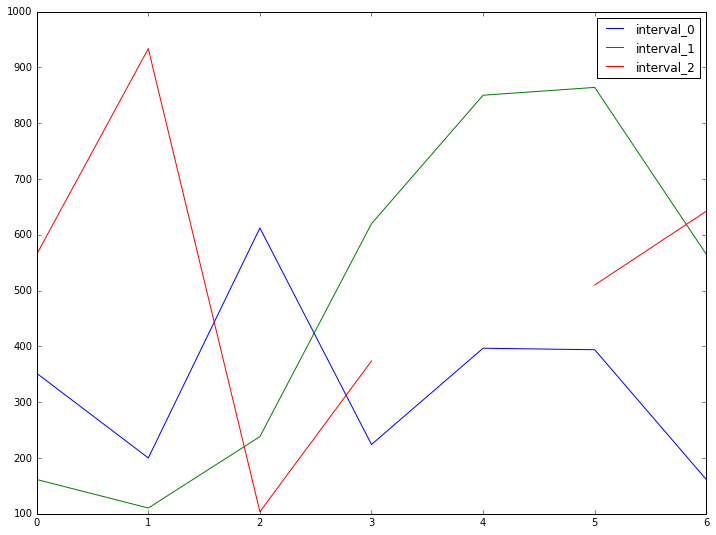

In [6]:
data2 = data1.pivot_table(index='local', columns=['location', 'parameter'], values='value')#[['100 ail']]
data3 = data2.resample('D').mean().xs('pm10', level=1, axis=1)[['100 ail']]

def cyclic_graph(data, start, end, interval):
    if isinstance(start, str):
        start = parser.parse(start)
    if isinstance(end, str):
        end = parser.parse(end)
    interval_int = interval
    if isinstance(interval, int):
        interval = datetime.timedelta(interval)
    else:
        interval_int = interval.days
    start_1, end_1 = start, start+interval
    table = {}
    interval_id = 0
    df = pd.DataFrame(index=np.arange(interval_int+1))
    while end_1<=end:
        ndf = data[start_1:end_1].copy()
        ndf.index = np.arange(interval_int+1)
        df['interval_{}'.format(interval_id)] = ndf['values']
        start_1 += interval
        end_1 += interval
        interval_id += 1
    return df

cyclic_graph(data3.rename(columns={'100 ail': 'values'}), '2015-12-07', '2015-12-28', 6).plot()
#data3.loc['2015-11-20':'2015-11-20'].rename(columns={'100 ail': 'values'})

In [7]:
df = (data2-data2.mean())/(data2.max()-data2.min())

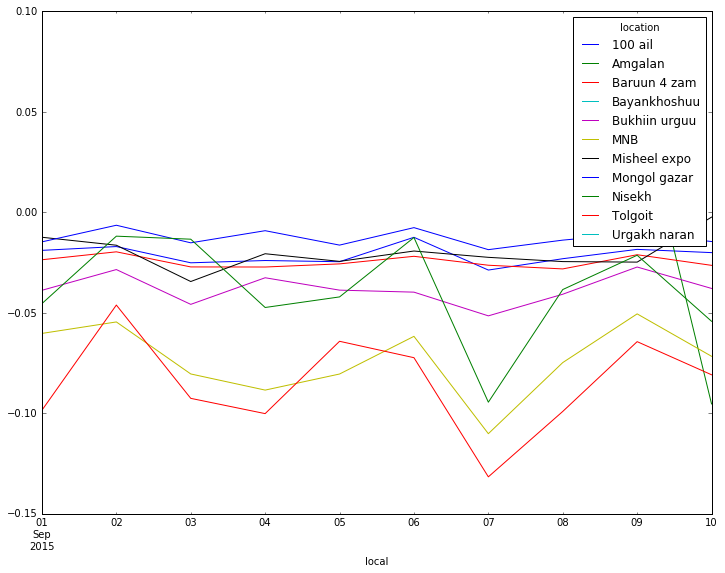

In [8]:
df['2015-09-01':'2015-09-10'].resample('D').mean().xs('pm10', level=1, axis=1).plot()

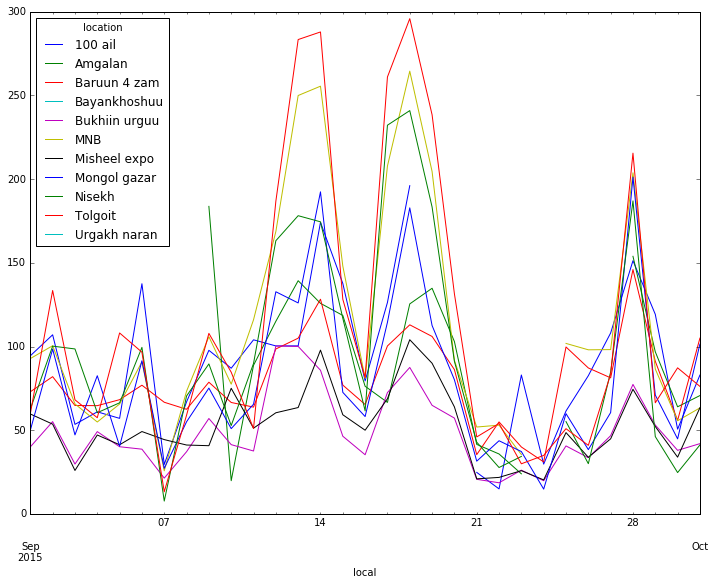

In [9]:
data2['2015-09-01':'2015-10-01'].resample('D').mean().xs('pm10', level=1, axis=1).plot()

In [22]:
data2.max()

location                         parameter
100 ail                          co           17763.0
                                 no2            165.0
                                 pm10          6619.0
                                 so2            508.0
Amgalan                          co            9592.0
                                 no2            154.0
                                 pm10          1010.0
                                 pm25           377.0
                                 so2            539.0
Baruun 4 zam                     co           13288.0
                                 no2            257.0
                                 pm10          2291.0
                                 pm25          2451.0
                                 so2            272.0
Bayankhoshuu                     pm10          1377.0
                                 pm25           871.0
                                 so2            144.0
Bukhiin urguu                    co    

In [17]:
data2.index.max()

Timestamp('2016-09-01 00:00:00')